### 변동성 돌파 전력
- ETF 종목 많이 사용
- 변동성이 적을 때 좋다
- 변동폭 = 전일 고가 - 전일 저가 -> 목표가를 설정 = 당일 시가 + (변동폭 * K) K는 정하기 나름


In [22]:
import pandas as pd 
from pykrx import stock # 9장에 사용법 나옴

In [23]:
df_kosdaq_150 = stock.get_market_ohlcv_by_date('20101001','20241230','229200')
df_kosdaq_150.head()

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN
2015-10-02,10135,10159,10135,10148,63224,0.465300
2015-10-05,10255,10265,10210,10231,43154,0.817895
2015-10-06,10248,10274,10172,10176,42399,-0.537582
2015-10-07,10094,10094,9947,9949,21324,-2.230739


In [24]:
df_kosdaq_150['변동폭'] = df_kosdaq_150['고가'] - df_kosdaq_150['저가']
df_kosdaq_150.head()

,시가,고가,저가,종가,거래량,등락률,변동폭
날짜,,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN,67
2015-10-02,10135,10159,10135,10148,63224,0.465300,24
2015-10-05,10255,10265,10210,10231,43154,0.817895,55
2015-10-06,10248,10274,10172,10176,42399,-0.537582,102
2015-10-07,10094,10094,9947,9949,21324,-2.230739,147


In [25]:
df_kosdaq_150['전일변동폭'] = df_kosdaq_150['변동폭'].shift(periods=1) #전일 변동폭이라서 
df_kosdaq_150.head()


,시가,고가,저가,종가,거래량,등락률,변동폭,전일변동폭
날짜,,,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN,67,NaN
2015-10-02,10135,10159,10135,10148,63224,0.465300,24,67.0
2015-10-05,10255,10265,10210,10231,43154,0.817895,55,24.0
2015-10-06,10248,10274,10172,10176,42399,-0.537582,102,55.0
2015-10-07,10094,10094,9947,9949,21324,-2.230739,147,102.0


In [26]:
K = 1/2
df_kosdaq_150['목표가'] = df_kosdaq_150['시가'] + (df_kosdaq_150['전일변동폭'] * K)
df_kosdaq_150.head()

,시가,고가,저가,종가,거래량,등락률,변동폭,전일변동폭,목표가
날짜,,,,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN,67,NaN,NaN
2015-10-02,10135,10159,10135,10148,63224,0.465300,24,67.0,10168.5
2015-10-05,10255,10265,10210,10231,43154,0.817895,55,24.0,10267.0
2015-10-06,10248,10274,10172,10176,42399,-0.537582,102,55.0,10275.5
2015-10-07,10094,10094,9947,9949,21324,-2.230739,147,102.0,10145.0


In [27]:
df_kosdaq_150['종가'] / df_kosdaq_150['목표가']

날짜
2015-10-01         NaN
2015-10-02    0.997984
2015-10-05    0.996494
2015-10-06    0.990317
2015-10-07    0.980680
                ...   
2024-12-20    0.969095
2024-12-23    0.989357
2024-12-24    0.989205
2024-12-26    0.983506
2024-12-27    0.980662
Length: 2272, dtype: float64

In [28]:
conditions = df_kosdaq_150['고가']>= df_kosdaq_150['목표가'] # K를 찾기 위해서 # 매도 조건 # 매수 조건은 찾아야 한다



In [ ]:
import numpy as np
df_kosdaq_150['수익률'] = np.where(conditions, df_kosdaq_150['종가'] / df_kosdaq_150['목표가'], 1)

In [32]:
df_kosdaq_150.head()

,시가,고가,저가,종가,거래량,등락률,변동폭,전일변동폭,목표가,수익률
날짜,,,,,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN,67,NaN,NaN,1.0
2015-10-02,10135,10159,10135,10148,63224,0.465300,24,67.0,10168.5,1.0
2015-10-05,10255,10265,10210,10231,43154,0.817895,55,24.0,10267.0,1.0
2015-10-06,10248,10274,10172,10176,42399,-0.537582,102,55.0,10275.5,1.0
2015-10-07,10094,10094,9947,9949,21324,-2.230739,147,102.0,10145.0,1.0


In [33]:
df_kosdaq_150['누적수익률'] = df_kosdaq_150['수익률'].cumprod()
df_kosdaq_150.tail()

,시가,고가,저가,종가,거래량,등락률,변동폭,전일변동폭,목표가,수익률,누적수익률
날짜,,,,,,,,,,,
2024-12-20,11235,11255,10925,10975,9686866,-2.401067,330,180.0,11325.0,1.000000,2.774530
2024-12-23,11110,11285,11000,11155,14527835,1.640091,285,330.0,11275.0,0.989357,2.745001
2024-12-24,11205,11270,11135,11225,6202421,0.627521,135,285.0,11347.5,1.000000,2.745001
2024-12-26,11300,11300,11135,11180,8372497,-0.400891,165,135.0,11367.5,1.000000,2.745001
2024-12-27,11165,11260,10970,11030,3753268,-1.341682,290,165.0,11247.5,0.980662,2.691919


#### 누적 수익률 이용한 CAGR 

In [34]:
delta_days = df_kosdaq_150.index[-1] - df_kosdaq_150.index[0]
delta_days.days

3375

In [36]:
year = delta_days.days / 365

In [40]:
# CAGR
CAGR = df_kosdaq_150['누적수익률'].iloc[-1] ** (1/year) -1
CAGR * 100 # 단순보유율과 비교 필요 

11.30390737021536

#### 전략 적용 vs 단순 보유

In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

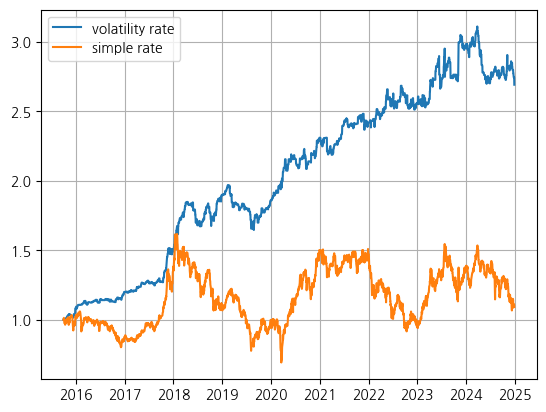

In [47]:

# 변동성 돌파 전략
plt.plot(df_kosdaq_150['누적수익률'], label= 'volatility rate')

# 단순 보유
plt.plot(df_kosdaq_150['종가'] / df_kosdaq_150['종가'].iloc[0] , label= 'simple rate'  )

plt.grid()
plt.legend()
plt.show()